#**Data** **Set** **Information**:

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.


**Business Insights:**

Using this data we can actually build a device, which can automatically predict the posture of the activity based on the data. 

This data is collected on Smart phone which is not always available to carry with us everywhere but industry so developed these days, we have smart watch which can keep track of physical activity. 

The data we have downloaded as only 6 predictions, but this approach can check your heart condition, blood circulation based on your physical activity and how lazy or active are you in your day to day life style.

Link to download the Data:
http://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

#**Features Information**:
For each record in the dataset it is provided:
- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.
- An identifier of the subject who carried out the experiment.


The data is based on two main senors properies, One is Accelerometer and the other is Gyroscope. 

An accelerometer is an electromechanical device used to measure acceleration forces. Such forces may be static, like the continuous force of gravity or, as is the case with many mobile devices, dynamic to sense movement or vibrations.


Gyro sensors, also known as angular rate sensors or angular velocity sensors, are devices that sense angular velocity. Angular velocity. In simple terms, angular velocity is the change in rotational angle per unit of time.

Using the above two sensors - 50% overlap(128readings/window), the basis statistics were apply on each window like mean, std, mad, angle, iqr, min, max, entropy of the signal, kutosis - height of the peak, skewness of the data etc. 

**Label Information:**

After the test on each individual suject, data on each subject was divided into 6:
1. 'STANDING',
2. 'SITTING',
3. 'LAYING',
4. 'WALKING',
5. 'WALKING_DOWNSTAIRS',
6. 'WALKING_UPSTAIRS'

Using the data downloaded, our task is to build a best suitable model. 





**Approach:**

UCI team has already got us every features that can be found on this data and provided to us for building a model. 

1. Load the Data.
2. Preprocess Data.
  - Check for Null Values. 
  - Duplicate Rows.
  - Check the Data collected is equally for each subject or not. 
3. EDA
4. Machine Learning Models. 
5. Deep Neural Nets (This is a sequential time series data, we can apply RNN, LSTM and GRU's.) 


In [0]:
#Basic modules to Load files and work on it. 
import numpy as np
import pandas as pd

In [2]:
#Lets load the data, X_Train, y_train, X_test, y_test. 
#Downlaoded data has another feature, suject - which are people who have actively participated. 
#We need to add that seperately into our train data. 

X_train = pd.read_csv('/content/drive/My Drive/Human Activity Recognition/UCI_HAR_Dataset/train/X_train.txt', delim_whitespace = True, header = None)
X_train['subject'] = pd.read_csv('/content/drive/My Drive/Human Activity Recognition/UCI_HAR_Dataset/train/subject_train.txt', header=None, squeeze=True)
X_train.shape

(7352, 562)

In [3]:
#load feature names. 
features = pd.read_csv('/content/drive/My Drive/Human Activity Recognition/UCI_HAR_Dataset/features.txt', sep = ' ', names = ['index', 'feature_name'])
features = list(features['feature_name'])
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [4]:
#We have 562 features in X_train and we have assign feature names for Unlabeled columns. 
#as we have 'Subject' as a feature in X_train, lets add the column name to features. 
features.append('subject')
print('Length of the features list: {}'.format(len(features)))
columns = features
# Removing '()' from column names
for index,col_name in enumerate(features):
  x = col_name.replace('()','')
  x = x.replace('-', '')
  features[index] = x.replace(',','')
print(features[0:10])
X_train.columns = features
print(X_train.columns)

Length of the features list: 562
['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX', 'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY', 'tBodyAccmadZ', 'tBodyAccmaxX']
Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagskewness', 'fBodyBodyGyroJerkMagkurtosis',
       'angle(tBodyAccMeangravity)', 'angle(tBodyAccJerkMean)gravityMean)',
       'angle(tBodyGyroMeangravityMean)',
       'angle(tBodyGyroJerkMeangravityMean)', 'angle(XgravityMean)',
       'angle(YgravityMean)', 'angle(ZgravityMean)', 'subject'],
      dtype='object', length=562)


In [5]:
X_train.head()#Checking the data after the column variable has been cleaned. 

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagiqr,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angle(tBodyAccMeangravity),angle(tBodyAccJerkMean)gravityMean),angle(tBodyGyroMeangravityMean),angle(tBodyGyroJerkMeangravityMean),angle(XgravityMean),angle(YgravityMean),angle(ZgravityMean),subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.991364,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.991134,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.986658,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,

In [6]:
#Reading y text file
y_train = pd.read_csv('/content/drive/My Drive/Human Activity Recognition/UCI_HAR_Dataset/train/y_train.txt', names=['Activity'])
y_train['Activity_Name'] = y_train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',
                              4:'SITTING', 5:'STANDING',6:'LAYING'})#Assigning string values to each class. 
y_train.head()#checking the head of the data. 

,Activity,Activity_Name
0,5,STANDING
1,5,STANDING
2,5,STANDING
3,5,STANDING
4,5,STANDING


In [7]:
#Now lets get all the the dataframes into one file.
train = X_train
train['Activity'], train['Activity_Name'] = y_train['Activity'], y_train['Activity_Name']#Concatinating X_train and y_train data that was loaded. 
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angle(tBodyAccMeangravity),angle(tBodyAccJerkMean)gravityMean),angle(tBodyGyroMeangravityMean),angle(tBodyGyroJerkMeangravityMean),angle(XgravityMean),angle(YgravityMean),angle(ZgravityMean),subject,Activity,Activity_Name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302

In [8]:
train.shape#Dimnensions of the data. 

(7352, 564)

In [9]:
#As we have done above, the same process is followd for loading/reading the test text file. 
X_test = pd.read_csv('/content/drive/My Drive/Human Activity Recognition/UCI_HAR_Dataset/test/X_test.txt', delim_whitespace = True, header = None)
X_test['subject'] = pd.read_csv('/content/drive/My Drive/Human Activity Recognition/UCI_HAR_Dataset/test/subject_test.txt', header=None, squeeze=True)
print(X_test.shape)
y_test = pd.read_csv('/content/drive/My Drive/Human Activity Recognition/UCI_HAR_Dataset/test/y_test.txt', names=['Activity'])
y_test['Activity_Name'] = y_test['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',
                              4:'SITTING', 5:'STANDING',6:'LAYING'})
print(y_test.shape)#Dimensions of the X_test and y_test

(2947, 562)
(2947, 2)


In [0]:
X_test.columns = features#Adding features to test column

In [11]:
#Now lets get all the the dataframes into one file.
test = X_test
test['Activity'], test['Activity_Name'] = y_test['Activity'], y_test['Activity_Name']
test.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angle(tBodyAccMeangravity),angle(tBodyAccJerkMean)gravityMean),angle(tBodyGyroMeangravityMean),angle(tBodyGyroJerkMeangravityMean),angle(XgravityMean),angle(YgravityMean),angle(ZgravityMean),subject,Activity,Activity_Name
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.968260,-0.561266,-0.897436,-0.168805,-0.662317,-0.925364,-0.985689,-0.983273,-0.983422,-0.986857,-0.989609,-0.985689,-0.999831,-0.986148,-0.809976,-0.936508,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897

**Preprocess Data:**

Checking Null Values

In [12]:
#Lets check if there's any NAN value??
print('NAN or Null in Train: {}'.format(train.isnull().values.sum()))
print('NAN or Null in Train: {}'.format(test.isnull().values.sum()))

NAN or Null in Train: 0
NAN or Null in Train: 0


Checking if there are any duplicate rows in the data. 

In [13]:
#Checking if there are any duplicates. 
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


In [14]:
#importing plotting modules, to visualize the data and get insights from it. 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


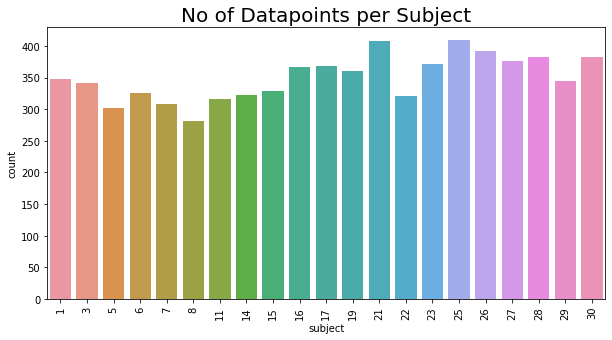

Number of features in Train_dataset: 7352
25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64


In [15]:
plt.figure(figsize=(10,5))#Figure size of the plot
plt.title('No of Datapoints per Subject', fontsize = 20)#Title name and Font size of the title. 
sns.countplot(train.subject)#Count plot sytax on suject column. 
plt.xticks(rotation = 90)#As X variables are strings, they cannot be row format, it would be overlapping. So rotating it to 90. 
plt.show()#shows the plot. 
#Obervation:
#All of the data points are equally available for each and every Subject
print("Number of features in Train_dataset: {}".format(train.shape[0]))
print(train.subject.value_counts())
 #All the data points are decently collected for each subjects. 

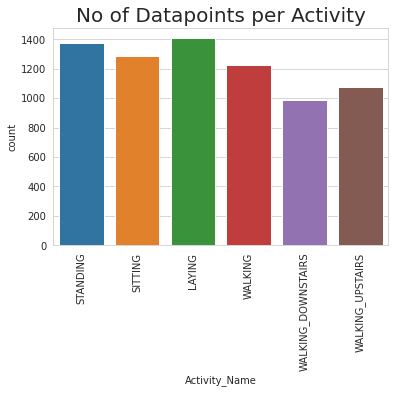

Number of features in Train_dataset: 7352
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity_Name, dtype: int64


In [16]:
sns.set_style('whitegrid')#Background style of the grid. 
plt.title('No of Datapoints per Activity', fontsize = 20)#Title name and Font size of the title.
sns.countplot(train.Activity_Name)#Count plot sytax on suject column.
plt.xticks(rotation = 90)#As X variables are strings, they cannot be row format, it would be overlapping. So rotating it to 90.
plt.show()
#Obervation:
#All of the data points are equally available for each and every activity
print("Number of features in Train_dataset: {}".format(train.shape[0]))
print(train.Activity_Name.value_counts())
#No of data points per activity is less for Walking_dowstairs and Walking upstairs. 
#Most probably, as the person has to walk up and down, physical strain would be high. 

**EDA - Exploratory Data Analysis**

In [0]:
#As there are large number of features. We can apply TSNE and Visualize the data with respective to y variables. 
#t-Distributed Stochastic Neighbor Embedding
from sklearn.manifold import TSNE

In [0]:
X = train.drop(['subject', 'Activity','Activity_Name'], axis = 1)#Assgning the X columns
y = train['Activity_Name']#Y 

In [0]:
X_embedded = TSNE(n_components=2).fit_transform(X)#perplexity=30.0 Default. 

In [0]:
tsne = pd.DataFrame({'x':X_embedded[:,0], 'y':X_embedded[:,1] ,'label':y})#Reducing the demensionality of the data from 561 to 2. 

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'TSNE Visualiztion')

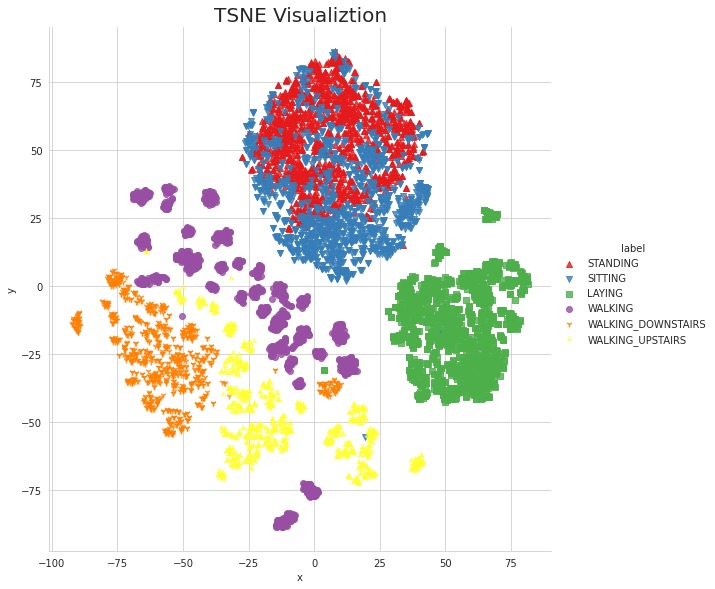

In [21]:
sns.lmplot(data=tsne, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])#Assigning tsne converted data. 
plt.title("TSNE Visualiztion", fontsize = 20)
#Observation:
#This data was too huge and as many features that were determined by Domain Experts. 
#Each of the features are from Mean, Standard Deviation, Kurtosis and so on. 
#We have to visualize all the columns in the data and see which one is the best to Predict the activity. 
#TSNE - t-Distributed Stochastic Neighbor Embedding, is a tool to visualize high-dimensional data.
#As you see, standing and sitting are overlapping with each, there might not be much of the physical activity when you sit or stand.
#So most of the standing data points are falling in the same region.
#Our utimate goal is to distinguish the Activity based on the data collected.

**Model Building:**

In [0]:
#Train data x and y 
X_train = train.drop(['subject', 'Activity','Activity_Name'], axis = 1)
y_train = train.Activity_Name

In [0]:
#Test data x and y 
X_test = test.drop(['subject', 'Activity', 'Activity_Name'], axis=1)
y_test = test.Activity_Name

In [24]:
print('X_train Dimensions: {}'.format(X_train.shape))
print('y_train Dimensions: {}'.format(y_train.shape))
print('X_test Dimensions: {}'.format(X_test.shape))
print('y_test Dimensions: {}'.format(y_test.shape))

X_train Dimensions: (7352, 561)
y_train Dimensions: (7352,)
X_test Dimensions: (2947, 561)
y_test Dimensions: (2947,)


In [0]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [0]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

**Logistic Regression Using Multinomial, class = Balanced.**

In [0]:
#Lets build a simple Logistic regression Multinomial.
#As there are six classes in this data set, we can assign multi_class as Multinomial and weights of the class as balanced. 
#This way, it will give equal importance to each and every class. 
lr = LogisticRegression(class_weight = 'balanced',multi_class='multinomial', solver='newton-cg')

In [28]:
lr.fit(X_train,y_train)#Fitting X and y in to logistic model. 

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=None, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

In [0]:
#Predicting y for both train and test. 
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [30]:
#Classification Report for Train data. 
#As you see, simple Logistic regression has trained trained itself.  
print(classification_report(y_train, y_train_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1407
           SITTING       0.98      0.98      0.98      1286
          STANDING       0.98      0.98      0.98      1374
           WALKING       1.00      1.00      1.00      1226
WALKING_DOWNSTAIRS       1.00      1.00      1.00       986
  WALKING_UPSTAIRS       1.00      1.00      1.00      1073

          accuracy                           0.99      7352
         macro avg       0.99      0.99      0.99      7352
      weighted avg       0.99      0.99      0.99      7352



In [31]:
#Simple Logistic Regression with L2 penalty, Class weight = Balanced and multi_class='multinomial'.
#Data is not overfitting.
print(classification_report(y_test, y_test_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.92       491
          STANDING       0.90      0.97      0.94       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



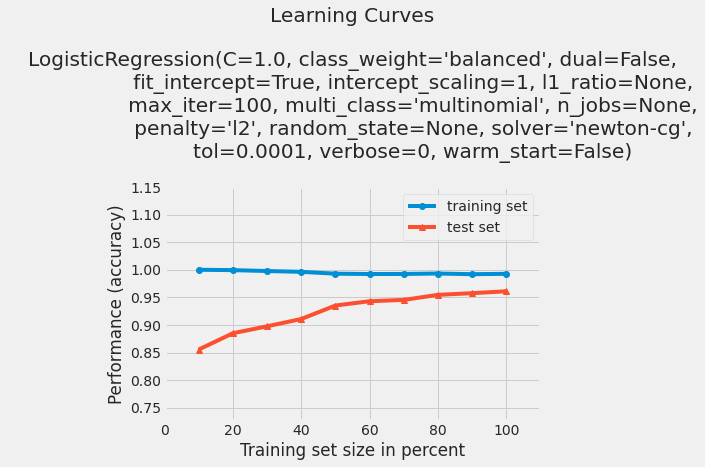

In [32]:
#As you see, while the model was building - training linearly constantly. 
#as the set size was increasing, the prediction is improving gradually. 
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train, y_train, X_test, y_test, lr,scoring = "accuracy")
plt.show()

**Support Vector Classifier**

In [0]:
#SVC module. 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [0]:
rbf_svm = SVC(kernel='rbf')# Support vector classifer with kernel rbf.
#rbf kernel can be used to most of the non-linear data seperation. 

In [35]:
rbf_svm.fit(X_train, y_train)#Fitting X and y in to the model. 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#predicting on train and test.  
y_train_pred = rbf_svm.predict(X_train)
y_test_pred = rbf_svm.predict(X_test)

In [37]:
#Classification Report on train. 
print(classification_report(y_train, y_train_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1407
           SITTING       0.94      0.94      0.94      1286
          STANDING       0.95      0.95      0.95      1374
           WALKING       1.00      1.00      1.00      1226
WALKING_DOWNSTAIRS       1.00      1.00      1.00       986
  WALKING_UPSTAIRS       1.00      1.00      1.00      1073

          accuracy                           0.98      7352
         macro avg       0.98      0.98      0.98      7352
      weighted avg       0.98      0.98      0.98      7352



In [38]:
#Classification report on train. 
print(classification_report(y_test, y_test_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.89      0.91       491
          STANDING       0.91      0.95      0.93       532
           WALKING       0.94      0.98      0.96       496
WALKING_DOWNSTAIRS       0.99      0.91      0.95       420
  WALKING_UPSTAIRS       0.93      0.96      0.94       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



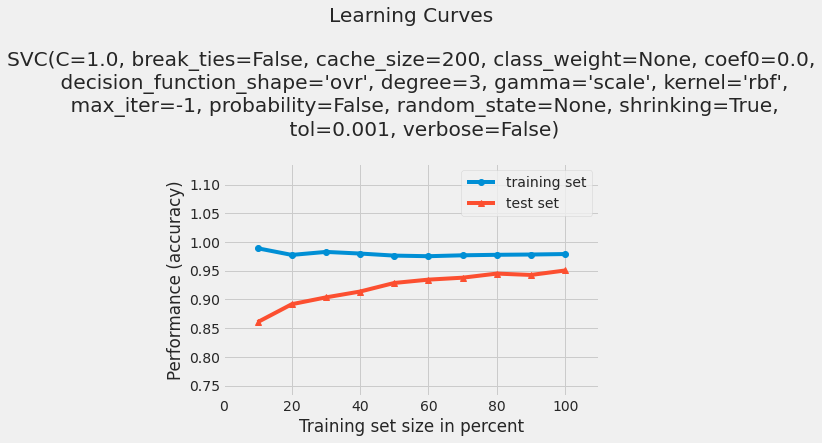

In [39]:
#As you see, while the model was building - training linearly constantly. 
#as the set size was increasing, the prediction is improving gradually. 
plot_learning_curves(X_train, y_train, X_test, y_test, rbf_svm, scoring='accuracy')
plt.show()

As you see, support vector machine - one the best classifier is performing the same as logistic regression. 

**Support Vector Classifier with GridsearchCV**

In [0]:
parameters = {'C':[2,8,16],'gamma': [ 0.0078125, 0.125, 2]}#Hyper-parameters for grid search. 
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)

In [41]:
rbf_svm_grid.fit(X_train, y_train)#Firring train x and y variable

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [2, 8, 16], 'gamma': [0.0078125, 0.125, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
#predicting on feature variable train 
y_train_pred = rbf_svm_grid.predict(X_train)
y_test_pred = rbf_svm_grid.predict(X_test)

In [43]:
#Classification Report
print(classification_report(y_train, y_train_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1407
           SITTING       0.99      0.99      0.99      1286
          STANDING       0.99      0.99      0.99      1374
           WALKING       1.00      1.00      1.00      1226
WALKING_DOWNSTAIRS       1.00      1.00      1.00       986
  WALKING_UPSTAIRS       1.00      1.00      1.00      1073

          accuracy                           1.00      7352
         macro avg       1.00      1.00      1.00      7352
      weighted avg       1.00      1.00      1.00      7352



In [44]:
#Grid search cv is performing the same as Normal support vector machine with RBF Kernel. 
print(classification_report(y_test, y_test_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



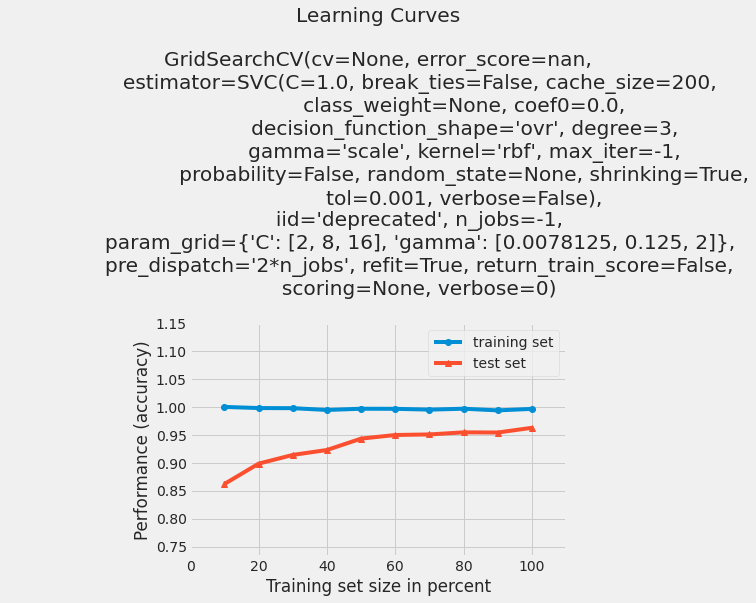

In [45]:
#As you see, while the model was building - training linearly constantly. 
#as the set size was increasing, the prediction is improving gradually. 
plot_learning_curves(X_train, y_train, X_test, y_test, rbf_svm_grid,scoring = "accuracy")
plt.show()

Observation:
Not much of the difference. 

In [0]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y_Tr = ohe.fit_transform(y_train.values.reshape(-1,1))#One hot encoding on each activity class. 
Y_te = ohe.transform(y_test.values.reshape(-1,1))#One hot encoding on each activity class. 

In [0]:
#Model parameters.
output_dim = Y_te.shape[1]#Output Dimension.
input_dim = X_train.shape[1]#Input Dimension.
batch_size = 128 #Batch size.
nb_epoch = 20# number of epochs. 

As the classifier models are performing the same in Logistic, Support Vector classifier. Let's try applying neural nets on this data.

Data:

It has 561 features and 7352 rows that were created by the expertise. 

In [49]:
#importing required moduels for Nueral nets. 
from keras.models import Sequential #Sequential format
from keras.layers import Dense, Activation #Layers and activation functions. 
from keras.layers.normalization import BatchNormalization# Normalizing the data. 
from keras.layers import Dropout# applying drop out. 
from keras import regularizers#regularizers for the activation fuctions that we are going to use.  
import tensorflow as tf#loading tensorflow
from keras.layers import LSTM#lstm layer. 

Using TensorFlow backend.


In [51]:
#Sequential mode. 
model_sigmoid = Sequential()
#Dropout and BatchNormalization on the input data
model_sigmoid.add(Dropout(0.5,input_shape=(input_dim,)))
model_sigmoid.add(BatchNormalization())
#Layer 1 - 512 Neurons, activation - sigmoid, l2 regularization. 
model_sigmoid.add(Dense(512, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dropout(0.5))
#Layer 2 - 256 Neurons, activation - sigmoid, l2 regularization.
model_sigmoid.add(Dense(256, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
model_sigmoid.add(BatchNormalization())
model_sigmoid.add(Dropout(0.5))
#Layer 3 - Output layer, softmax - As we have to predict multiclass. 
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 561)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 561)               2244      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               287744    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)              

In [52]:
#compling the model using adaptive optimizer, categorical cross entropy for loss, metrics  - accuracy. 
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_sigmoid.fit(X_train, Y_Tr, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_te))

Train on 7352 samples, validate on 2947 samples
Epoch 1/20
7352/7352 [==============================] - 1s 175us/step - loss: 8.5538 - accuracy: 0.6519 - val_loss: 7.6770 - val_accuracy: 0.2043
Epoch 2/20
7352/7352 [==============================] - 1s 111us/step - loss: 5.5295 - accuracy: 0.8113 - val_loss: 4.9905 - val_accuracy: 0.7197
Epoch 3/20
7352/7352 [==============================] - 1s 111us/step - loss: 3.5902 - accuracy: 0.8455 - val_loss: 3.2677 - val_accuracy: 0.8412
Epoch 4/20
7352/7352 [==============================] - 1s 111us/step - loss: 2.3819 - accuracy: 0.8581 - val_loss: 2.1578 - val_accuracy: 0.8755
Epoch 5/20
7352/7352 [==============================] - 1s 112us/step - loss: 1.6907 - accuracy: 0.8609 - val_loss: 1.5626 - val_accuracy: 0.8707
Epoch 6/20
7352/7352 [==============================] - 1s 112us/step - loss: 1.2287 - accuracy: 0.8726 - val_loss: 1.0987 - val_accuracy: 0.9057
Epoch 7/20
7352/7352 [==============================] - 1s 111us/step - loss

For 20 epochs,  the rate of the performance is not as expected.

**Now lets work on raw data from Inertial Signals.** 

This is the Raw data which is not edited and sequencial. 

On this data we can apply RNN or LSTM

The frist part would be on 9 raw data collected by the expertise with out and changes made on it.
Here we have 7532 rows and 128 columns for each data text. 

On the first LSTM model, we're going to predict on 6 out puts.

On the second LSTM model, we're going to covert the class column into two:


1.   Static - {Standing, Sitting, Sleeping}
2.   List item - {Walking, Walking upstairs, Walking downstairs}



In [0]:
#Getting list of the text files from the directory.
import os
entries = os.listdir('/content/drive/My Drive/Human Activity Recognition/UCI_HAR_Dataset/train/Inertial Signals')

In [0]:
#A loop to read all the files in sequence and then convert them into as we need to run a sequencial data.
#For Train. 
for i in range(len(entries)):
  location = f'/content/drive/My Drive/Human Activity Recognition/UCI_HAR_Dataset/train/Inertial Signals/{entries[i]}'
  entries[i] = pd.read_csv(location,delim_whitespace=True, header = None).values
X_train= np.transpose(entries, (1,2,0))# Here we are transposing the data to get 7352 rows, 128 time stamps and 9 inputs for each 128 timestamp

In [0]:
#Getting list of the text files from the directory.
entries = os.listdir('/content/drive/My Drive/Human Activity Recognition/UCI_HAR_Dataset/test/Inertial Signals')

In [0]:
#A loop to read all the files in sequence and then convert them into as we need to run a sequencial data.
#For Test. 
for i in range(len(entries)):
  location = f'/content/drive/My Drive/Human Activity Recognition/UCI_HAR_Dataset/test/Inertial Signals/{entries[i]}'
  entries[i] = pd.read_csv(location,delim_whitespace=True, header = None).values
X_test =  np.transpose(entries, (1,2,0))

In [58]:
#Checking if we have collected the data in correct format for Train. 
print(len(X_train))
print(len(X_train[0]))
print(len(X_train[0][0]))

7352
128
9


In [59]:
#Checking if we have collected the data in correct format for Test. 
print(len(X_test))
print(len(X_test[0]))
print(len(X_test[0][0]))

2947
128
9


In [0]:
#Coverting the y variables into 6 columns and we can use softmax on it. 
y_train = pd.get_dummies(train['Activity_Name']).values
y_test = pd.get_dummies(test['Activity_Name']).values

In [61]:
timesteps = len(X_train[0])#128 Timesteps
input_dim = len(X_train[0][0])#Input  dimensions. 
n_classes = y_train.shape[1]#Number of classes.

print("Timesteps:{}".format(timesteps))
print("Input_dim:{}".format(input_dim))
print("Number of Rows:{}".format(len(X_train)))
print("Number of Classes:{}".format(n_classes))

128
9
7352
6


In [66]:
#Sequential Model
model_deep_lstm = Sequential()
#Layer 1 LSTM, input shape, timestamp value, dropout - Normalized random variable and applying batch normalization. 
model_deep_lstm.add(LSTM(64, return_sequences=True,input_shape = (timesteps, input_dim)))
model_deep_lstm.add(Dropout(abs(np.random.normal(0,1))))
model_deep_lstm.add(BatchNormalization())
#Layer 2 LSTM, timestamp value, dropout - Normalized random variable and applying batch normalization. 
model_deep_lstm.add(LSTM(32,return_sequences=True))
model_deep_lstm.add(Dropout(abs(np.random.normal(0,1))))
model_deep_lstm.add(BatchNormalization())
#Layer 3 LSTM, timestamp value, dropout - Normalized random variable and applying batch normalization. 
model_deep_lstm.add(LSTM(16))
model_deep_lstm.add(Dropout(abs(np.random.normal(0,1))))
model_deep_lstm.add(BatchNormalization())
#Layer 4 Output
model_deep_lstm.add(Dense(n_classes, activation = 'softmax'))
model_deep_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128, 64)           18944     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128, 64)           0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 64)           256       
_________________________________________________________________
lstm_2 (LSTM)                (None, 128, 32)           12416     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 32)           128       
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)               

In [67]:
#compling the model using rmsprop optimizer, categorical cross entropy for loss, metrics  - accuracy. 
model_deep_lstm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model_deep_lstm.fit(X_train, Y_Tr, batch_size=32, epochs=30, verbose=1, validation_data=(X_test, Y_te))

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 70s 10ms/step - loss: 0.8796 - accuracy: 0.6774 - val_loss: 1.2108 - val_accuracy: 0.5416
Epoch 2/30
7352/7352 [==============================] - 68s 9ms/step - loss: 0.3892 - accuracy: 0.8769 - val_loss: 0.3192 - val_accuracy: 0.8877
Epoch 3/30
7352/7352 [==============================] - 68s 9ms/step - loss: 0.2375 - accuracy: 0.9215 - val_loss: 0.2819 - val_accuracy: 0.8985
Epoch 4/30
7352/7352 [==============================] - 68s 9ms/step - loss: 0.1916 - accuracy: 0.9320 - val_loss: 1.5059 - val_accuracy: 0.6983
Epoch 5/30
7352/7352 [==============================] - 68s 9ms/step - loss: 0.1674 - accuracy: 0.9404 - val_loss: 0.1911 - val_accuracy: 0.9345
Epoch 6/30
7352/7352 [==============================] - 68s 9ms/step - loss: 0.1731 - accuracy: 0.9348 - val_loss: 0.1999 - val_accuracy: 0.9209
Epoch 7/30
7352/7352 [==============================] - 73s 10ms/step - loss: 0.1

For 30 Epocs:
*   Train accuracy: 95.06
*   Test Accuracy: 92.06



**Converting Multi-Class(6) to 2 Class classification.** 

In [0]:
#Converting Train class to Static and Dynamic. 
train['class_2'] = train['Activity'].map({1:'dynamic', 2:'dynamic', 3:'dynamic', 4:'static', 5:'static', 6:'static'})

In [72]:
train['class_2'].value_counts()

static     4067
dynamic    3285
Name: class_2, dtype: int64

In [0]:
#Converting Test class to Static and Dynamic. 
test['class_2'] = test['Activity'].map({1:'dynamic', 2:'dynamic', 3:'dynamic', 4:'static', 5:'static', 6:'static'})

In [74]:
test['class_2'].value_counts()

static     1560
dynamic    1387
Name: class_2, dtype: int64

In [0]:
#Converting string to binary 0 and 1 - Train. 
train['class_2'] = train['class_2'].map({'static':0,'dynamic':1})

In [0]:
#Converting string to binary 0 and 1 - Train. 
test['class_2'] = test['class_2'].map({'static':0,'dynamic':1})

In [0]:
y_train = train['class_2']# y train

In [0]:
y_test = test['class_2']# y test

In [79]:
#Sequential Model
model_deep_lstm = Sequential()
#Layer 1 LSTM, input shape, timestamp value, dropout - Normalized random variable and applying batch normalization. 
model_deep_lstm.add(LSTM(64, return_sequences=True,input_shape = (timesteps, data_dim)))
model_deep_lstm.add(Dropout(abs(np.random.normal(0,1))))
model_deep_lstm.add(BatchNormalization())
#Layer 2 LSTM, timestamp value, dropout - Normalized random variable and applying batch normalization. 
model_deep_lstm.add(LSTM(32,return_sequences=True))
model_deep_lstm.add(Dropout(abs(np.random.normal(0,1))))
model_deep_lstm.add(BatchNormalization())
#Layer 3 LSTM, timestamp value, dropout - Normalized random variable and applying batch normalization. 
model_deep_lstm.add(LSTM(16))
model_deep_lstm.add(Dropout(abs(np.random.normal(0,1))))
model_deep_lstm.add(BatchNormalization())
#Layer 4 Output
model_deep_lstm.add(Dense(1, activation = 'sigmoid'))
model_deep_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128, 64)           18944     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128, 64)           0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 128, 64)           256       
_________________________________________________________________
lstm_5 (LSTM)                (None, 128, 32)           12416     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128, 32)           0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 128, 32)           128       
_________________________________________________________________
lstm_6 (LSTM)                (None, 16)               

In [80]:
#compling the model using rmsprop optimizer, categorical cross entropy for loss, metrics  - accuracy. 
model_deep_lstm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model_deep_lstm.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 61s 8ms/step - loss: 0.2718 - accuracy: 0.9004 - val_loss: 0.1904 - val_accuracy: 0.9413
Epoch 2/10
7352/7352 [==============================] - 65s 9ms/step - loss: 0.1232 - accuracy: 0.9693 - val_loss: 0.0723 - val_accuracy: 0.9844
Epoch 3/10
7352/7352 [==============================] - 63s 9ms/step - loss: 0.0889 - accuracy: 0.9744 - val_loss: 0.0102 - val_accuracy: 0.9980
Epoch 4/10
7352/7352 [==============================] - 67s 9ms/step - loss: 0.0689 - accuracy: 0.9773 - val_loss: 0.0357 - val_accuracy: 0.9936
Epoch 5/10
7352/7352 [==============================] - 66s 9ms/step - loss: 0.0580 - accuracy: 0.9805 - val_loss: 0.0354 - val_accuracy: 0.9881
Epoch 6/10
7352/7352 [==============================] - 70s 9ms/step - loss: 0.0589 - accuracy: 0.9810 - val_loss: 0.0573 - val_accuracy: 0.9925
Epoch 7/10
7352/7352 [==============================] - 68s 9ms/step - loss: 0.049

For 10 Epochs on 2 Class, classifications:
*   Train accuracy : 98.10
*   Test accuracy  : 99.86
Which is quit good when we are trying to classify the data. 



**Model Peformance:**


*   Logistic Regression: Train_F1_score = 0.99, Test_F1_score = 0.96
*   SVC                : Train_F1_score = 0.98, Test_F1_score = 0.95
*   SVC_Grid           : Train_F1_score = 0.99, Test_F1_score = 0.96
*   MLP_Sigmoid        : Train_Accuracy = 0.87, Test_Accuracy = 0.85
*   LSTM_SoftMax       : Train_Accuracy = 0.95, Test_Accuracy = 0.92 (6 Class)
*   LSTM_Sigmoid       : Train_Accuracy = 0.98, Test_Accuracy = 0.99 (2 Class)











On my observation each model has performed there best in there own way. 

On comparision, LSTM_Sigmoid on both Train and Test data

